In [136]:
# Import necessary libraries for time, random, plotting, and data handling
import time
import random
import matplotlib.pyplot as plt
import pandas as pd

In [137]:
# Function to simulate First Come First Served (FCFS) page replacement algorithm
def fcfs(pages, capacity):
    memory = []
    page_faults = 0
    for page in pages:
        if page not in memory:
            if len(memory) < capacity:
                memory.append(page)
            else:
                memory.pop(0)
                memory.append(page)
            page_faults += 1
    return page_faults

In [138]:
# Function to simulate Least Recently Used (LRU) page replacement algorithm
def lru(pages, capacity):
    memory = []
    page_faults = 0
    for page in pages:
        if page not in memory:
            if len(memory) < capacity:
                memory.append(page)
            else:
                memory.pop(0)
                memory.append(page)
            page_faults += 1
        else:
            memory.remove(page)
            memory.append(page)
    return page_faults

In [139]:
# Helper function to predict the optimal replacement and the Optimal page replacement algorithm
def predict(pages, memory, index):
    farthest = index
    res = -1
    for i, page in enumerate(memory):
        if page not in pages[index:]:
            return i
        else:
            j = pages[index:].index(page) + index
            if j > farthest:
                farthest = j
                res = i
    return 0 if res == -1 else res


def optimal(pages, capacity):
    memory = []
    page_faults = 0
    for i in range(len(pages)):
        if pages[i] not in memory:
            if len(memory) < capacity:
                memory.append(pages[i])
            else:
                j = predict(pages, memory, i + 1)
                memory[j] = pages[i]
            page_faults += 1
    return page_faults

In [140]:
# Define test configurations with different page counts, capacities, and ranges
test_configs = [
    {"num_pages": 500, "capacity": 5, "page_range": 20},
    {"num_pages": 1000, "capacity": 5, "page_range": 30},
    {"num_pages": 1500, "capacity": 8, "page_range": 40},
    {"num_pages": 2000, "capacity": 10, "page_range": 50},
    {"num_pages": 2500, "capacity": 12, "page_range": 60},
    {"num_pages": 3000, "capacity": 15, "page_range": 70},
    {"num_pages": 500, "capacity": 10, "page_range": 50},
    {"num_pages": 1000, "capacity": 8, "page_range": 25},
    {"num_pages": 1500, "capacity": 6, "page_range": 35},
    {"num_pages": 2000, "capacity": 5, "page_range": 60},
    {"num_pages": 3500, "capacity": 20, "page_range": 80},
    {"num_pages": 4000, "capacity": 25, "page_range": 100},
    {"num_pages": 4500, "capacity": 30, "page_range": 120},
    {"num_pages": 5000, "capacity": 35, "page_range": 150},
    {"num_pages": 5500, "capacity": 40, "page_range": 200},
    {"num_pages": 6000, "capacity": 45, "page_range": 250},
    {"num_pages": 7000, "capacity": 50, "page_range": 300},
    {"num_pages": 8000, "capacity": 60, "page_range": 350},
    {"num_pages": 9000, "capacity": 70, "page_range": 400},
    {"num_pages": 10000, "capacity": 80, "page_range": 450},
    {"num_pages": 1200, "capacity": 4, "page_range": 20},
    {"num_pages": 1600, "capacity": 6, "page_range": 45},
    {"num_pages": 2200, "capacity": 7, "page_range": 55},
    {"num_pages": 2700, "capacity": 9, "page_range": 65},
    {"num_pages": 3200, "capacity": 11, "page_range": 75},
    {"num_pages": 3700, "capacity": 13, "page_range": 85},
    {"num_pages": 4200, "capacity": 15, "page_range": 95},
    {"num_pages": 4700, "capacity": 17, "page_range": 105},
    {"num_pages": 5200, "capacity": 19, "page_range": 115},
    {"num_pages": 5700, "capacity": 21, "page_range": 125},
]

In [141]:
# Run simulations for all test configurations and collect results
all_results = []

for config in test_configs:
    pages = [
        random.randint(1, config["page_range"]) for _ in range(config["num_pages"])
    ]

    start = time.perf_counter()
    fcfs_faults = fcfs(pages, config["capacity"])
    fcfs_time = time.perf_counter() - start

    start = time.perf_counter()
    lru_faults = lru(pages, config["capacity"])
    lru_time = time.perf_counter() - start

    start = time.perf_counter()
    opt_faults = optimal(pages, config["capacity"])
    opt_time = time.perf_counter() - start

    all_results.append(
        {
            "num_pages": config["num_pages"],
            "capacity": config["capacity"],
            "page_range": config["page_range"],
            "fcfs_faults": fcfs_faults,
            "fcfs_time": fcfs_time,
            "lru_faults": lru_faults,
            "lru_time": lru_time,
            "opt_faults": opt_faults,
            "opt_time": opt_time,
        }
    )

results_df = pd.DataFrame(all_results)
print(results_df)

    num_pages  capacity  page_range  fcfs_faults  fcfs_time  lru_faults  \
0         500         5          20          391   0.000042         386   
1        1000         5          30          848   0.000082         844   
2        1500         8          40         1217   0.000142        1227   
3        2000        10          50         1606   0.000209        1604   
4        2500        12          60         2003   0.000301        2008   
5        3000        15          70         2343   0.000372        2351   
6         500        10          50          402   0.000047         395   
7        1000         8          25          678   0.000112         681   
8        1500         6          35         1231   0.000123        1227   
9        2000         5          60         1849   0.000145        1847   
10       3500        20          80         2618   0.000477        2640   
11       4000        25         100         2981   0.000662        2967   
12       4500        30  

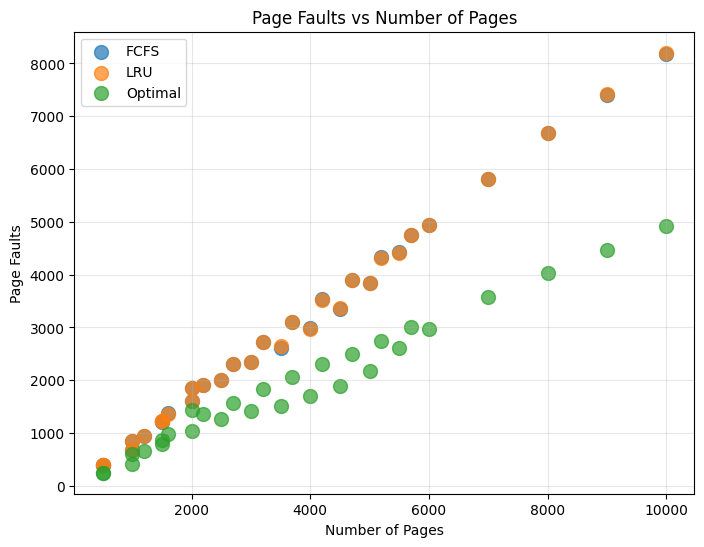

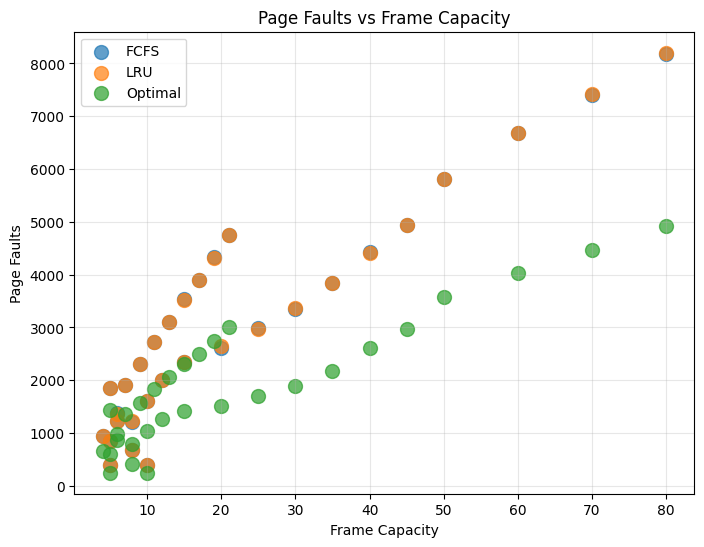

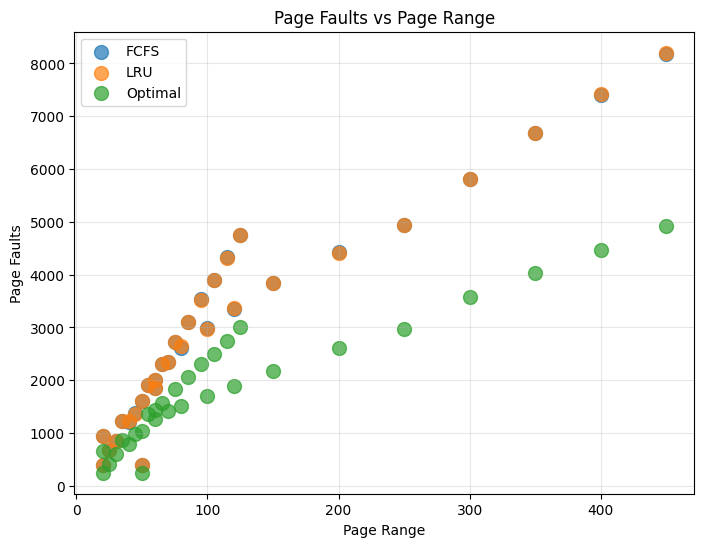

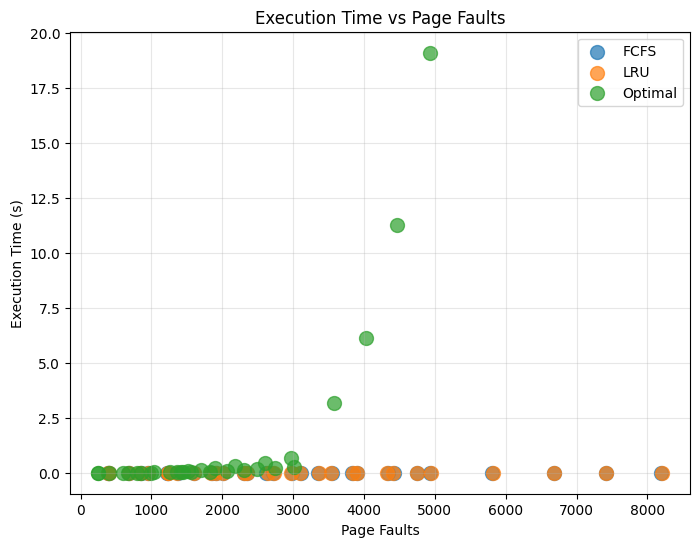

In [142]:
# Plot the results using matplotlib to visualize performance separately

# Plot 1: Page Faults vs Number of Pages
plt.figure(figsize=(8, 6))
plt.scatter(
    results_df["num_pages"], results_df["fcfs_faults"], label="FCFS", alpha=0.7, s=100
)
plt.scatter(
    results_df["num_pages"], results_df["lru_faults"], label="LRU", alpha=0.7, s=100
)
plt.scatter(
    results_df["num_pages"], results_df["opt_faults"], label="Optimal", alpha=0.7, s=100
)
plt.xlabel("Number of Pages")
plt.ylabel("Page Faults")
plt.title("Page Faults vs Number of Pages")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot 2: Page Faults vs Frame Capacity
plt.figure(figsize=(8, 6))
plt.scatter(
    results_df["capacity"], results_df["fcfs_faults"], label="FCFS", alpha=0.7, s=100
)
plt.scatter(
    results_df["capacity"], results_df["lru_faults"], label="LRU", alpha=0.7, s=100
)
plt.scatter(
    results_df["capacity"], results_df["opt_faults"], label="Optimal", alpha=0.7, s=100
)
plt.xlabel("Frame Capacity")
plt.ylabel("Page Faults")
plt.title("Page Faults vs Frame Capacity")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot 3: Page Faults vs Page Range
plt.figure(figsize=(8, 6))
plt.scatter(
    results_df["page_range"], results_df["fcfs_faults"], label="FCFS", alpha=0.7, s=100
)
plt.scatter(
    results_df["page_range"], results_df["lru_faults"], label="LRU", alpha=0.7, s=100
)
plt.scatter(
    results_df["page_range"],
    results_df["opt_faults"],
    label="Optimal",
    alpha=0.7,
    s=100,
)
plt.xlabel("Page Range")
plt.ylabel("Page Faults")
plt.title("Page Faults vs Page Range")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot 4: Execution Time vs Page Faults
plt.figure(figsize=(8, 6))
plt.scatter(
    results_df["fcfs_faults"], results_df["fcfs_time"], label="FCFS", alpha=0.7, s=100
)
plt.scatter(
    results_df["lru_faults"], results_df["lru_time"], label="LRU", alpha=0.7, s=100
)
plt.scatter(
    results_df["opt_faults"], results_df["opt_time"], label="Optimal", alpha=0.7, s=100
)
plt.xlabel("Page Faults")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time vs Page Faults")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()